In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

Select dataset:

In [2]:
X_train = X_train_bow
X_test = X_test_bow

# Basic training

In [9]:
softmax_model = LogisticRegression(multi_class='multinomial')
softmax_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9889
	- Micro F1 score: 0.9889
	- Macro F1 score: 0.9866
Score of on test are:
	- Accuracy score: 0.8740
	- Micro F1 score: 0.8740
	- Macro F1 score: 0.8371


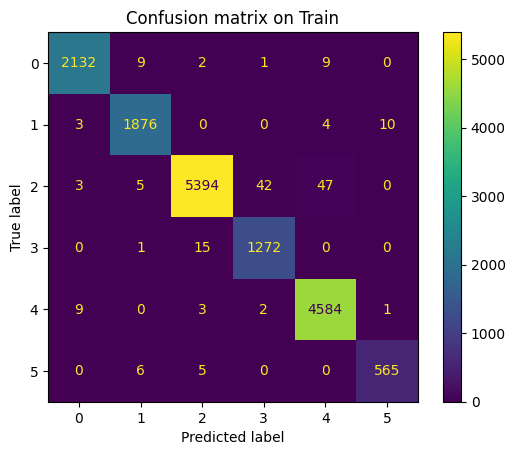

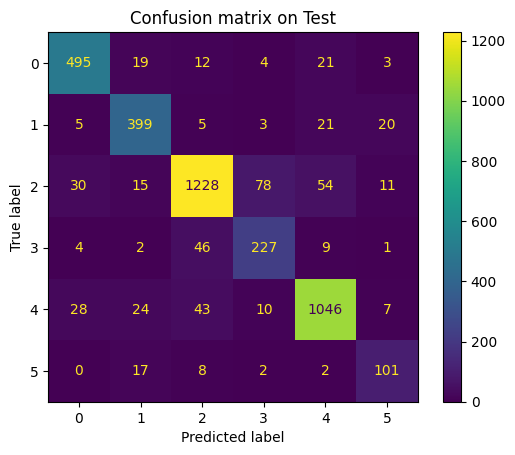

In [10]:
evaluate_model(softmax_model, X_train, X_test, y_train, y_test, include_training=True)

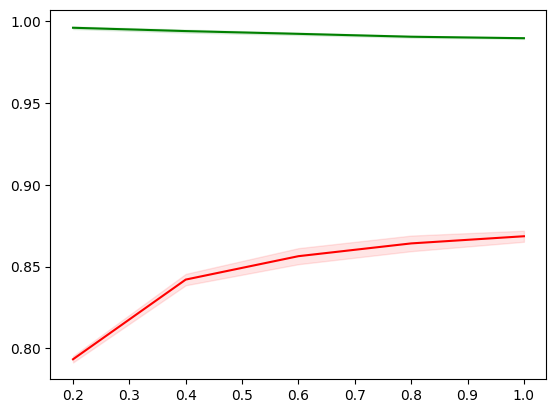

In [6]:
draw_learning_curve(softmax_model, X_train, y_train)

# Multiple tuning

## No regularization

In [28]:
softmax_model = LogisticRegression(penalty=None, solver='lbfgs', multi_class='multinomial')
softmax_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', penalty=None)

Score of on train are:
	- Accuracy score: 0.9925
	- Micro F1 score: 0.9925
	- Macro F1 score: 0.9905
Score of on test are:
	- Accuracy score: 0.8620
	- Micro F1 score: 0.8620
	- Macro F1 score: 0.8282


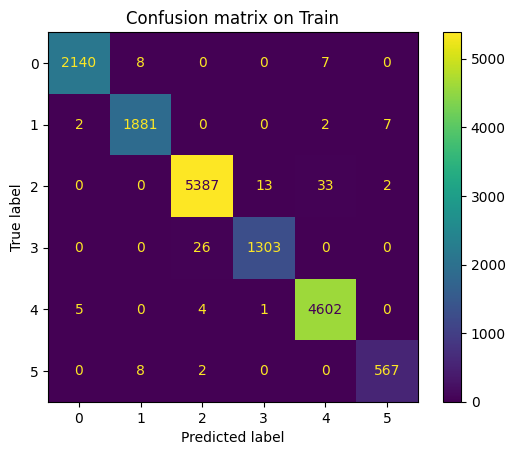

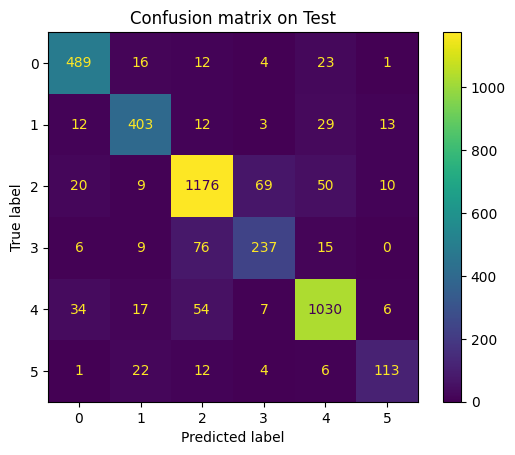

In [29]:
evaluate_model(softmax_model, X_train, X_test, y_train, y_test, include_training=True)

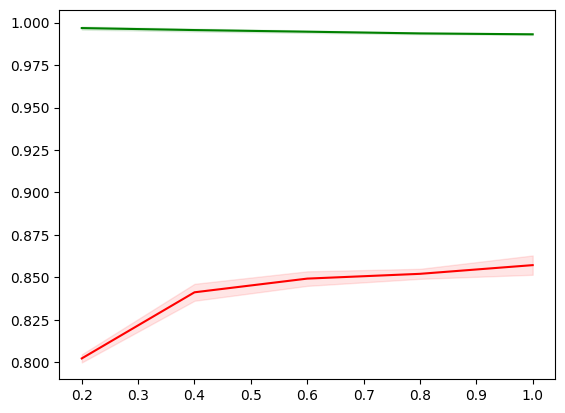

In [30]:
draw_learning_curve(softmax_model, X_train, y_train)

## L1 regularization

First, we try to plot the validation score through a list of C from 0.001 to 100

In [31]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l1', solver='saga', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3386875, 0.338625, 0.859, 0.926125, 0.987625, 0.9890625, 0.99025]
[0.3386875000000001, 0.33831249999999996, 0.836, 0.877, 0.8730625, 0.8723750000000001, 0.8703125]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

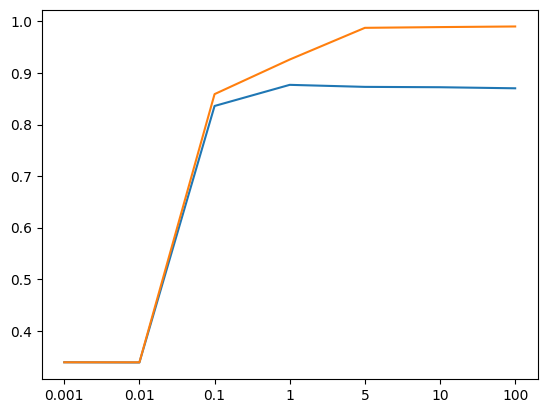

In [32]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = 1$, then we scope to $C=1$:

In [42]:
C_list = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l1', solver='saga', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
[0.8589375, 0.88675, 0.903625, 0.9145625, 0.926125, 0.9350625, 0.94225, 0.9521875, 0.9649375]
[0.83575, 0.8668125, 0.8762500000000001, 0.8771875, 0.8768750000000001, 0.8759375, 0.8748750000000001, 0.874375, 0.8730625]


[Text(0, 0, '0.1'),
 Text(1, 0, '0.25'),
 Text(2, 0, '0.5'),
 Text(3, 0, '0.75'),
 Text(4, 0, '1'),
 Text(5, 0, '1.25'),
 Text(6, 0, '1.5'),
 Text(7, 0, '1.75'),
 Text(8, 0, '2')]

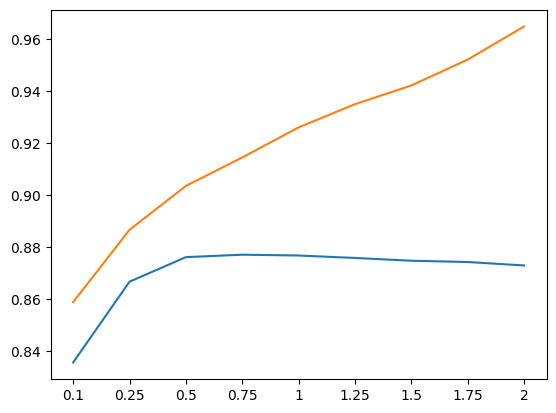

In [43]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=1$ to be the best model.

In [47]:
best_l1_softmax_model = LogisticRegression(C=1, penalty='l1', solver='saga', multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9263
	- Micro F1 score: 0.9263
	- Macro F1 score: 0.9073
Score of on test are:
	- Accuracy score: 0.8802
	- Micro F1 score: 0.8802
	- Macro F1 score: 0.8501


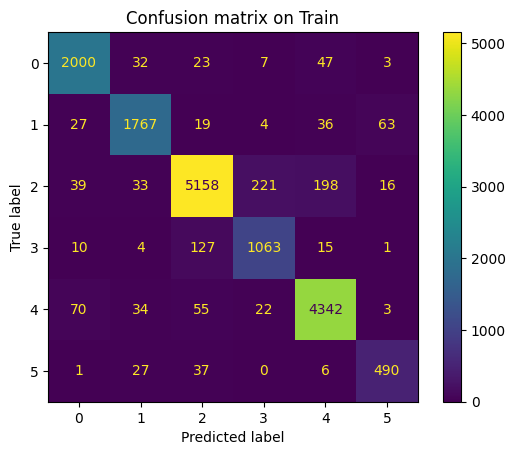

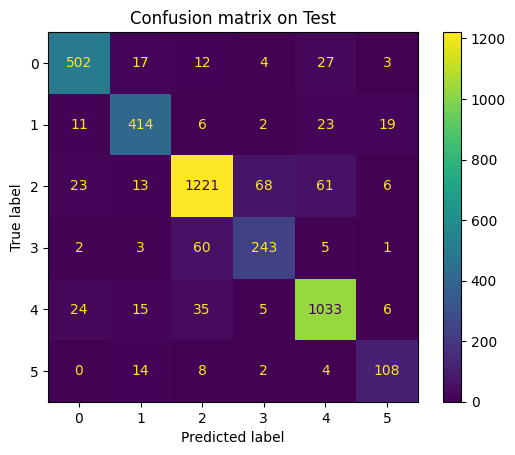

In [48]:
best_l1_softmax_model.fit(X_train, y_train)
evaluate_model(best_l1_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

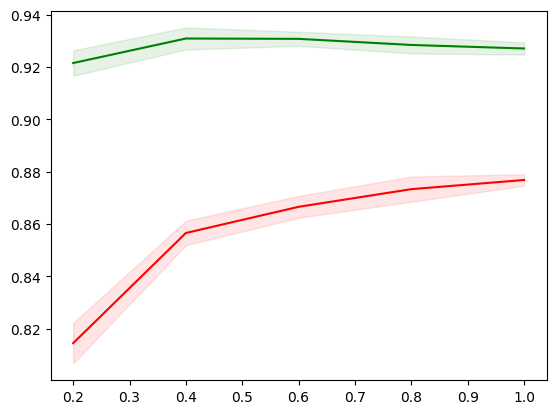

In [49]:
draw_learning_curve(best_l1_softmax_model, X_train, y_train)

## L2 regularization

We do the same with L1 regularization

In [17]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.390375, 0.6790625, 0.94425, 0.9889375, 0.992375, 0.992625, 0.9925625]
[0.360625, 0.6050000000000001, 0.8440624999999999, 0.8685625000000001, 0.8665, 0.8655625, 0.860375]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

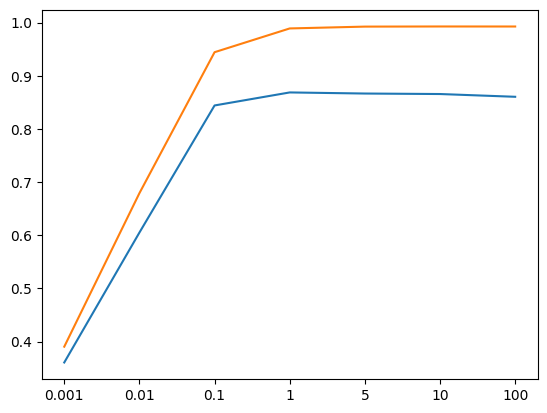

In [18]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = 1$, then we scope to $C=1$:

In [19]:
C_list = [0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    softmax_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='multinomial')
    softmax_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, softmax_model.predict(X_train))
    cv_score = np.mean(cross_val_score(softmax_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2]
[0.94425, 0.971375, 0.9826875, 0.9889375, 0.9898125, 0.99075, 0.991125, 0.9914375]
[0.8440624999999999, 0.8591875, 0.8660625, 0.8685625000000001, 0.8684375, 0.8681875, 0.867875, 0.8678125]


[Text(0, 0, '0.1'),
 Text(1, 0, '0.25'),
 Text(2, 0, '0.5'),
 Text(3, 0, '1'),
 Text(4, 0, '1.25'),
 Text(5, 0, '1.5'),
 Text(6, 0, '1.75'),
 Text(7, 0, '2')]

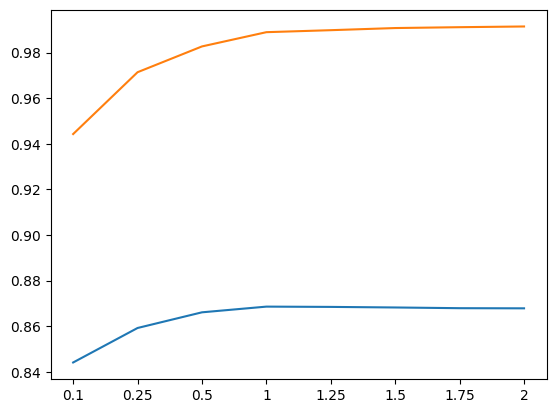

In [20]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=1$ to be the best model.

In [21]:
best_l2_softmax_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs', multi_class='multinomial')

Score of on train are:
	- Accuracy score: 0.9889
	- Micro F1 score: 0.9889
	- Macro F1 score: 0.9866
Score of on test are:
	- Accuracy score: 0.8740
	- Micro F1 score: 0.8740
	- Macro F1 score: 0.8371


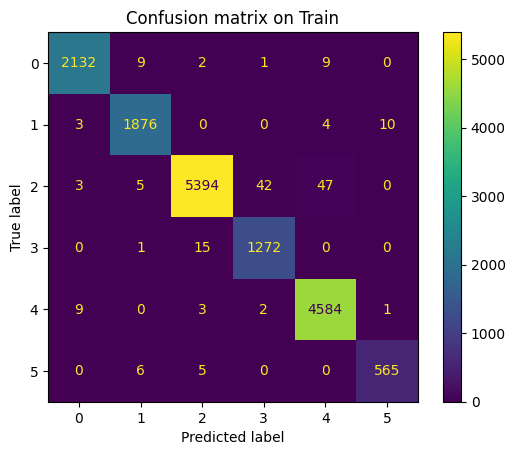

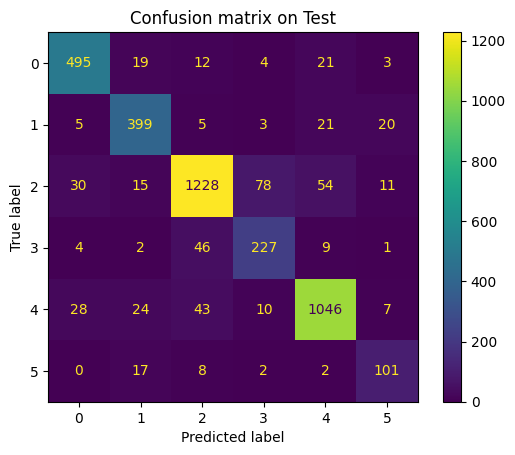

In [22]:
best_l2_softmax_model.fit(X_train, y_train)
evaluate_model(best_l2_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

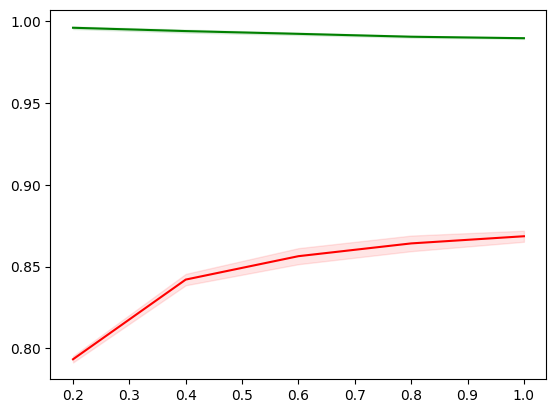

In [23]:
draw_learning_curve(best_l2_softmax_model, X_train, y_train)

## Elastic regularization

In [50]:
dict_param = {
    'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100],
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

softmax_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial')
grid_search = GridSearchCV(softmax_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [51]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
df = df[df['score'] < 0.8]
print("Bad hyperparameter:")
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 35 // len(dict_param[param]):
      print(param, value)

Bad hyperparameter:
C 0.001
C 0.01


In [53]:
dict_param = {
    'C' : np.logspace(0, 2, 5),
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

softmax_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial')
grid_search = GridSearchCV(softmax_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='multinomial',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ]),
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [54]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df)

             C  l1_ratio     score
0     1.000000       0.1  0.871438
1     1.000000       0.3  0.873062
2     1.000000       0.5  0.874437
3     1.000000       0.7  0.875188
4     1.000000       0.9  0.876250
5     3.162278       0.1  0.870250
6     3.162278       0.3  0.872000
7     3.162278       0.5  0.873125
8     3.162278       0.7  0.873000
9     3.162278       0.9  0.872812
10   10.000000       0.1  0.869750
11   10.000000       0.3  0.870562
12   10.000000       0.5  0.871125
13   10.000000       0.7  0.871250
14   10.000000       0.9  0.871562
15   31.622777       0.1  0.869875
16   31.622777       0.3  0.870188
17   31.622777       0.5  0.870187
18   31.622777       0.7  0.870125
19   31.622777       0.9  0.870125
20  100.000000       0.1  0.869250
21  100.000000       0.3  0.869938
22  100.000000       0.5  0.870188
23  100.000000       0.7  0.870125
24  100.000000       0.9  0.870187


In [55]:
print(grid_search.best_estimator_, grid_search.best_score_)

LogisticRegression(l1_ratio=0.9, multi_class='multinomial',
                   penalty='elasticnet', solver='saga') 0.87625


In [56]:
best_en_softmax_model = LogisticRegression(C=1, l1_ratio=0.9, multi_class='multinomial',
                   penalty='elasticnet', solver='saga')

Score of on train are:
	- Accuracy score: 0.9293
	- Micro F1 score: 0.9293
	- Macro F1 score: 0.9113
Score of on test are:
	- Accuracy score: 0.8808
	- Micro F1 score: 0.8808
	- Macro F1 score: 0.8505


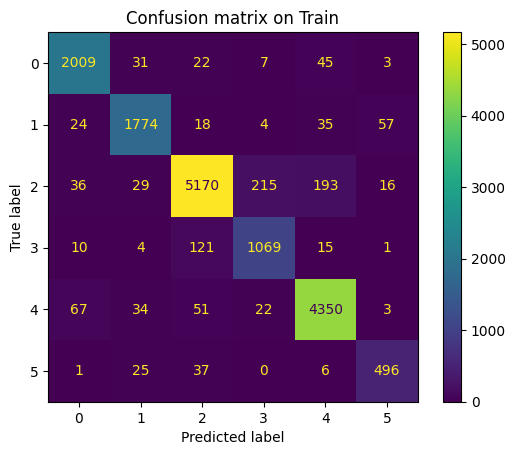

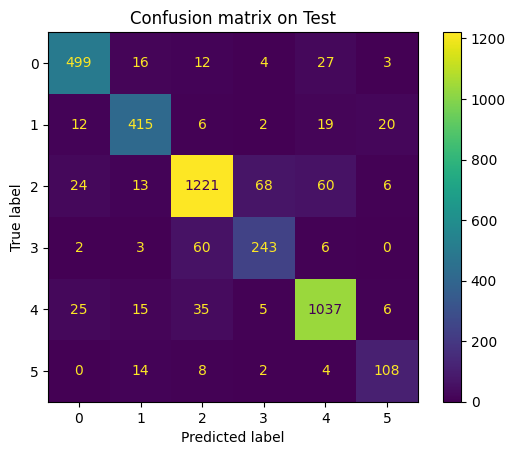

In [57]:
best_en_softmax_model.fit(X_train, y_train)
evaluate_model(best_en_softmax_model, X_train, X_test, y_train, y_test, include_training=True)

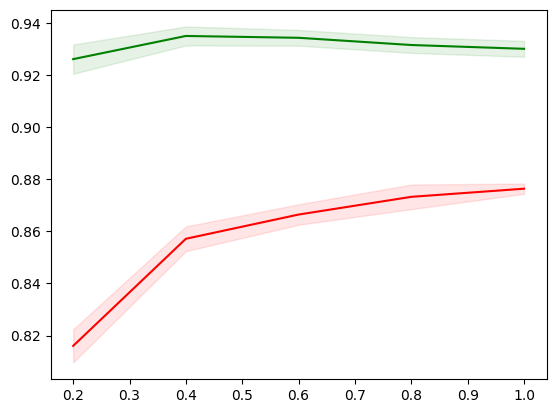

In [58]:
draw_learning_curve(best_en_softmax_model, X_train, y_train)

# Conclusion

There are a few difference among the accuracy of these 3 regularization. However, Elastic-net regularization gives the best performance then I will choose it to be the best model in this notebook.

In [59]:
best_softmax_model = best_en_softmax_model

In [60]:
directory = "data/models/softmax/"

dump(best_softmax_model, directory + "best_softmax_bow_model.joblib")

FileNotFoundError: [Errno 2] No such file or directory: 'data/models/softmax/best_softmax_bow_model.joblib'